In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

combined_data_path = '/Users/yilu/Downloads/pythonProject/Combined.csv'
combined_data = pd.read_csv(combined_data_path)

imputer = SimpleImputer(strategy='mean')
combined_data_imputed = imputer.fit_transform(combined_data)

combined_data = pd.DataFrame(combined_data_imputed, columns=combined_data.columns)

X = combined_data.drop(columns=['label'])
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {accuracy}")

Accuracy of Naive Bayes model: 0.9937305280972345


AUC of Naive Bayes model: 0.9901731486868058
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    103447
         1.0       0.46      0.95      0.62       549

    accuracy                           0.99    103996
   macro avg       0.73      0.97      0.81    103996
weighted avg       1.00      0.99      0.99    103996



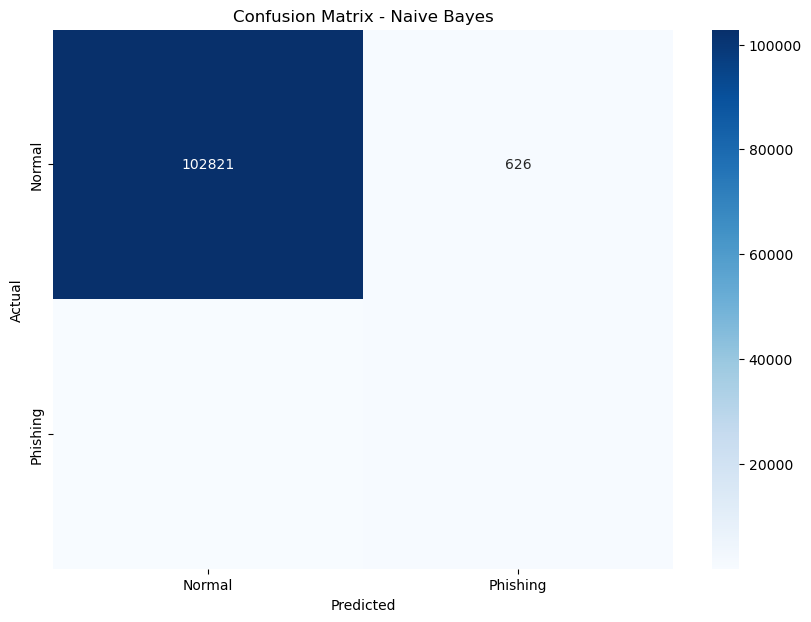

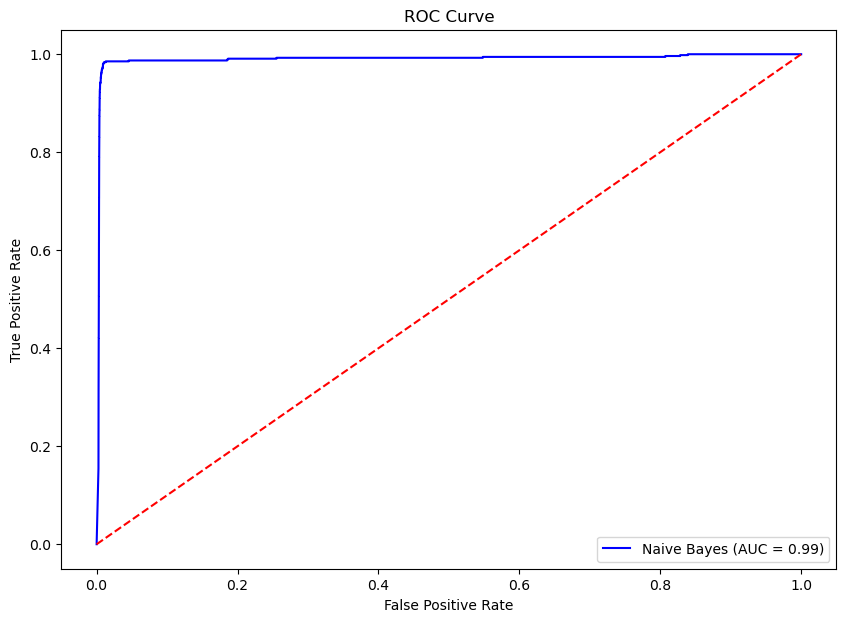

The Naive Bayes model is saved to a file: /Users/yilu/Downloads/pythonProject/Naive_Bayes_model.pkl


In [2]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC of Naive Bayes model: {auc}")

print("Classification report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'Naive Bayes (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

model_path = '/Users/yilu/Downloads/pythonProject/Naive_Bayes_model.pkl'
joblib.dump(model, model_path)
print(f"The Naive Bayes model is saved to a file: {model_path}")